- pd.set_option('display.max_rows', None)
- pd.set_option('display.max_columns', None)

In [1]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics
import warnings



from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Child = pd.read_csv('./중복학대포함.csv',encoding = 'cp949')
Child

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,21,22,25,29,31,44,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,개별사건번호,피해아동대상자,학대행위자대상,아동_성별,아동_연령대,아동_내국인여부,아동_최종학력,아동_직업유형,아동_거주상태,아동_친권자유형,...,아조_가정복귀,행조_아동과의분리,행조_만나지못함,행조_모니터링,행조_고소고발사건처,행조_사건처리만나지,New_Abuse_Count,New_재학대혐의여부,New_Call_Count,판단_유형_중복
0,1.020000e+20,CASRCP20121010398,CASRCP20121020314,M,NaN,내국인,NaN,NaN,자택,양부모,...,0,0,0,0,0,0,NaN,NaN,0.0,0.0
1,8.040000e+20,CASRCP20150110545,CASRCP20150120502,M,NaN,내국인,NaN,NaN,기타,친부모,...,0,0,0,1,0,0,0.0,N,0.0,1.0
2,4.020000e+20,CASRCP20141211229,CASRCP20141221114,M,NaN,내국인,NaN,NaN,NaN,친부,...,0,0,0,0,0,0,NaN,NaN,0.0,0.0
3,4.020000e+20,CASRCP20141211178,CASRCP20141221114,F,NaN,내국인,NaN,NaN,NaN,친부,...,0,0,0,0,0,0,NaN,NaN,0.0,0.0
4,1.060000e+20,CASRCP20141211459,CASRCP20141221403,F,NaN,내국인,NaN,NaN,보증금(전세)+월세,친부모,...,0,0,0,0,0,0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,5.800000e+21,CASRCP20180100595,CASRCP20180100597,M,1~3세,내국인,NaN,어린이집,NaN,친모,...,0,0,0,1,0,0,0.0,N,0.0,1.0
122031,5.120000e+21,CASRCP20180100289,CASRCP20180100290,F,13~15세,내국인,재학중,초등학교,NaN,친모,...,0,0,0,1,0,0,0.0,N,0.0,1.0
122032,6.400000e+21,CASRCP20180102065,CASRCP20180102067,F,NaN,NaN,NaN,NaN,NaN,친부모,...,0,0,0,0,0,0,NaN,NaN,0.0,0.0
122033,5.720000e+21,CASRCP20180101264,CASRCP20180101266,M,1~3세,내국인,재학중,어린이집,NaN,친부모,...,0,0,0,0,0,0,NaN,NaN,0.0,0.0


In [3]:
Child.columns

Index(['개별사건번호', '피해아동대상자', '학대행위자대상', '아동_성별', '아동_연령대', '아동_내국인여부',
       '아동_최종학력', '아동_직업유형', '아동_거주상태', '아동_친권자유형',
       ...
       '아조_가정복귀', '행조_아동과의분리', '행조_만나지못함', '행조_모니터링', '행조_고소고발사건처',
       '행조_사건처리만나지', 'New_Abuse_Count', 'New_재학대혐의여부', 'New_Call_Count',
       '판단_유형_중복'],
      dtype='object', length=159)

In [4]:
# EDA 해서 4개 변수 뽑기
Child_4 = Child[['아동_가구소득구분코', '신고_접수경로구분코', '신고_재신고유형', '판단_학대발생빈도']]
Child_4

,아동_가구소득구분코,신고_접수경로구분코,신고_재신고유형,판단_학대발생빈도
0,250만원이상-300만원미만,112,NaN,NaN
1,NaN,112,NaN,일회성
2,NaN,112,NaN,NaN
3,NaN,112,NaN,NaN
4,300만원이상,112,NaN,NaN
...,...,...,...,...
122030,NaN,112,NaN,일회성
122031,NaN,112,NaN,2주일에 한번
122032,NaN,112,NaN,NaN
122033,NaN,112,NaN,NaN


In [5]:
Child_4 = pd.get_dummies(Child_4)
Child_4.fillna(0)
Child_4

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_1년에 한번,판단_학대발생빈도_1주일에 한번,판단_학대발생빈도_2-3개월에 한번,판단_학대발생빈도_2~3일에 한번,판단_학대발생빈도_2년에 한번,판단_학대발생빈도_2주일에 한번,판단_학대발생빈도_3년에 한번,판단_학대발생빈도_6개월에 한번,판단_학대발생빈도_거의 매일,판단_학대발생빈도_일회성
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
122031,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
122032,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
122033,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
for i in Child_4.columns:
    print(i)

아동_가구소득구분코_100만원이상-150만원미만
아동_가구소득구분코_150만원이상-200만원미만
아동_가구소득구분코_200만원이상-250만원미만
아동_가구소득구분코_250만원이상-300만원미만
아동_가구소득구분코_300만원이상
아동_가구소득구분코_50만원미만
아동_가구소득구분코_50만원이상~100만원미만
신고_접수경로구분코_112
신고_접수경로구분코_119
신고_접수경로구분코_129
신고_접수경로구분코_1366
신고_접수경로구분코_기타
신고_접수경로구분코_내방
신고_접수경로구분코_방문신고
신고_접수경로구분코_상담원 인지신고
신고_접수경로구분코_아동보호전문기관일반전화
신고_접수경로구분코_아동행복지원
신고_접수경로구분코_아동행복지원  상담원인지신고
신고_접수경로구분코_아동행복지원  읍면동인지신고
신고_접수경로구분코_인터넷
신고_접수경로구분코_일반전화
신고_접수경로구분코_타기관통보
신고_재신고유형_동일센터 사례종결후 재신고
신고_재신고유형_사례진행중 재신고
신고_재신고유형_일반상담 후 재신고
신고_재신고유형_타센터 사례종결후 재신고
판단_학대발생빈도_1개월에 한번
판단_학대발생빈도_1년에 한번
판단_학대발생빈도_1주일에 한번
판단_학대발생빈도_2-3개월에 한번
판단_학대발생빈도_2~3일에 한번
판단_학대발생빈도_2년에 한번
판단_학대발생빈도_2주일에 한번
판단_학대발생빈도_3년에 한번
판단_학대발생빈도_6개월에 한번
판단_학대발생빈도_거의 매일
판단_학대발생빈도_일회성


In [7]:
for i in Child_4:
    print(i, Child_4[i].unique())

아동_가구소득구분코_100만원이상-150만원미만 [0 1]
아동_가구소득구분코_150만원이상-200만원미만 [0 1]
아동_가구소득구분코_200만원이상-250만원미만 [0 1]
아동_가구소득구분코_250만원이상-300만원미만 [1 0]
아동_가구소득구분코_300만원이상 [0 1]
아동_가구소득구분코_50만원미만 [0 1]
아동_가구소득구분코_50만원이상~100만원미만 [0 1]
신고_접수경로구분코_112 [1 0]
신고_접수경로구분코_119 [0 1]
신고_접수경로구분코_129 [0 1]
신고_접수경로구분코_1366 [0 1]
신고_접수경로구분코_기타 [0 1]
신고_접수경로구분코_내방 [0 1]
신고_접수경로구분코_방문신고 [0 1]
신고_접수경로구분코_상담원 인지신고 [0 1]
신고_접수경로구분코_아동보호전문기관일반전화 [0 1]
신고_접수경로구분코_아동행복지원 [0 1]
신고_접수경로구분코_아동행복지원  상담원인지신고 [0 1]
신고_접수경로구분코_아동행복지원  읍면동인지신고 [0 1]
신고_접수경로구분코_인터넷 [0 1]
신고_접수경로구분코_일반전화 [0 1]
신고_접수경로구분코_타기관통보 [0 1]
신고_재신고유형_동일센터 사례종결후 재신고 [0 1]
신고_재신고유형_사례진행중 재신고 [0 1]
신고_재신고유형_일반상담 후 재신고 [0 1]
신고_재신고유형_타센터 사례종결후 재신고 [0 1]
판단_학대발생빈도_1개월에 한번 [0 1]
판단_학대발생빈도_1년에 한번 [0 1]
판단_학대발생빈도_1주일에 한번 [0 1]
판단_학대발생빈도_2-3개월에 한번 [0 1]
판단_학대발생빈도_2~3일에 한번 [0 1]
판단_학대발생빈도_2년에 한번 [0 1]
판단_학대발생빈도_2주일에 한번 [0 1]
판단_학대발생빈도_3년에 한번 [0 1]
판단_학대발생빈도_6개월에 한번 [0 1]
판단_학대발생빈도_거의 매일 [0 1]
판단_학대발생빈도_일회성 [0 1]


In [8]:
Child_date = Child['신고_접수연도']

In [9]:
Child_4 = pd.concat([Child_4,Child_date],axis = 1)
Child_4

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_1주일에 한번,판단_학대발생빈도_2-3개월에 한번,판단_학대발생빈도_2~3일에 한번,판단_학대발생빈도_2년에 한번,판단_학대발생빈도_2주일에 한번,판단_학대발생빈도_3년에 한번,판단_학대발생빈도_6개월에 한번,판단_학대발생빈도_거의 매일,판단_학대발생빈도_일회성,신고_접수연도
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2014
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2014
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2014
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2014
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2018
122031,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2018
122032,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2018
122033,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2018


In [10]:
Child_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122035 entries, 0 to 122034
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   아동_가구소득구분코_100만원이상-150만원미만  122035 non-null  uint8
 1   아동_가구소득구분코_150만원이상-200만원미만  122035 non-null  uint8
 2   아동_가구소득구분코_200만원이상-250만원미만  122035 non-null  uint8
 3   아동_가구소득구분코_250만원이상-300만원미만  122035 non-null  uint8
 4   아동_가구소득구분코_300만원이상          122035 non-null  uint8
 5   아동_가구소득구분코_50만원미만           122035 non-null  uint8
 6   아동_가구소득구분코_50만원이상~100만원미만   122035 non-null  uint8
 7   신고_접수경로구분코_112              122035 non-null  uint8
 8   신고_접수경로구분코_119              122035 non-null  uint8
 9   신고_접수경로구분코_129              122035 non-null  uint8
 10  신고_접수경로구분코_1366             122035 non-null  uint8
 11  신고_접수경로구분코_기타               122035 non-null  uint8
 12  신고_접수경로구분코_내방               122035 non-null  uint8
 13  신고_접수경로구분코_방문신고             122035 non-null 

In [11]:
Child_4 = Child_4.astype(float)

# Train(2014-2017) / test(2018)

In [12]:
# X_train 지정
X_train = Child_4[(Child_4['신고_접수연도'] == 2014) | (Child_4['신고_접수연도'] == 2015) | (Child_4['신고_접수연도'] == 2016) | (Child_4['신고_접수연도'] == 2017)]
X_train = X_train.drop('신고_접수연도',axis=1)
X_train

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_1년에 한번,판단_학대발생빈도_1주일에 한번,판단_학대발생빈도_2-3개월에 한번,판단_학대발생빈도_2~3일에 한번,판단_학대발생빈도_2년에 한번,판단_학대발생빈도_2주일에 한번,판단_학대발생빈도_3년에 한번,판단_학대발생빈도_6개월에 한번,판단_학대발생빈도_거의 매일,판단_학대발생빈도_일회성
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88465,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
88467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# X_test 지정
X_test = Child_4[(Child_4['신고_접수연도'] == 2018)]
X_test = X_test.drop('신고_접수연도',axis=1)
X_test

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_1년에 한번,판단_학대발생빈도_1주일에 한번,판단_학대발생빈도_2-3개월에 한번,판단_학대발생빈도_2~3일에 한번,판단_학대발생빈도_2년에 한번,판단_학대발생빈도_2주일에 한번,판단_학대발생빈도_3년에 한번,판단_학대발생빈도_6개월에 한번,판단_학대발생빈도_거의 매일,판단_학대발생빈도_일회성
88470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88472,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
122031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y = Child[['New_재학대혐의여부','신고_접수연도']]
y['New_재학대혐의여부'] = y['New_재학대혐의여부'].fillna(0)
y

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,New_재학대혐의여부,신고_접수연도
0,0,2014
1,N,2014
2,0,2014
3,0,2014
4,0,2014
...,...,...
122030,N,2018
122031,N,2018
122032,0,2018
122033,0,2018


In [15]:
# 시간걸림
for i in y.index:
    if (y.loc[i,'New_재학대혐의여부'] == 'Y'):
        y.loc[i,'New_재학대혐의여부'] = 1
    if (y.loc[i,'New_재학대혐의여부'] == 'N'):
        y.loc[i,'New_재학대혐의여부'] = 0

y = y.astype(float)
y['New_재학대혐의여부'].value_counts()

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0.0    107678
1.0     14357
Name: New_재학대혐의여부, dtype: int64

In [16]:
# pd.set_option('display.max_rows', None)
y

,New_재학대혐의여부,신고_접수연도
0,0.0,2014.0
1,0.0,2014.0
2,0.0,2014.0
3,0.0,2014.0
4,0.0,2014.0
...,...,...
122030,0.0,2018.0
122031,0.0,2018.0
122032,0.0,2018.0
122033,0.0,2018.0


In [17]:
y_train = y[(y['신고_접수연도'] == 2014) | (y['신고_접수연도'] == 2015) | (y['신고_접수연도'] == 2016) | (y['신고_접수연도'] == 2017)]
y_train = y_train.drop(['신고_접수연도'],axis=1)

y_test = y[(y['신고_접수연도'] == 2018)]
y_test = y_test.drop(['신고_접수연도'],axis=1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88470, 37)
(33565, 37)
(88470, 1)
(33565, 1)


In [19]:
Child_4_X_y = Child_4
Child_4_X_y['New_재학대혐의여부'] = y['New_재학대혐의여부']
Child_4_X_y

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_2-3개월에 한번,판단_학대발생빈도_2~3일에 한번,판단_학대발생빈도_2년에 한번,판단_학대발생빈도_2주일에 한번,판단_학대발생빈도_3년에 한번,판단_학대발생빈도_6개월에 한번,판단_학대발생빈도_거의 매일,판단_학대발생빈도_일회성,신고_접수연도,New_재학대혐의여부
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,0.0
122031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0,0.0
122032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0
122033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0


In [20]:
Child_4_X_y.to_csv('./4 variables from EDA.csv', encoding='cp949', index=False)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logit.fit(X_train,y_train)
cp_list = []
y_list = []
y_pred = Logit.predict(X_test) # 임계점 0.5 
print("임계점 default(0.5)일 때 정확도 : " ,accuracy_score(y_test, y_pred),"\n") 

for i in range(1,10): # 임계점 0.3부터 0.6 구간까지 측정
    cp = i/10
    cp_list.append(cp)
    
    y_pred = (Logit.predict_proba(X_test)[:,1] >= cp).astype(bool) # 임계점 0.3
    y_list.append(accuracy_score(y_test, y_pred))
    
    print("임계점 %.1f 일때 정확도는 %.2f입니다." %(cp,accuracy_score(y_test, y_pred)))

print("\n가장 정확도가 높은 임계점은 %.1f입니다." %(cp_list[y_list.index(max(y_list))]))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


임계점 default(0.5)일 때 정확도 :  0.8492179353493222 

임계점 0.1 일때 정확도는 0.75입니다.
임계점 0.2 일때 정확도는 0.79입니다.
임계점 0.3 일때 정확도는 0.84입니다.
임계점 0.4 일때 정확도는 0.85입니다.
임계점 0.5 일때 정확도는 0.85입니다.
임계점 0.6 일때 정확도는 0.85입니다.
임계점 0.7 일때 정확도는 0.85입니다.
임계점 0.8 일때 정확도는 0.85입니다.
임계점 0.9 일때 정확도는 0.85입니다.

가장 정확도가 높은 임계점은 0.4입니다.


In [22]:
print(Logit.score(X_train, y_train))

0.9139256245054821


In [23]:
print(Logit.score(X_test, y_test))

0.8492179353493222


In [24]:
print("훈련 세트 정확도 : {:.5f}".format(Logit.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Logit.score(X_test,y_test)))

훈련 세트 정확도 : 0.91393
테스트 세트 정확도 : 0.84922


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))
    
get_clf_eval(y_test, y_pred)

오차행렬:
 [[28501     0]
 [ 5064     0]]

정확도: 0.8491
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

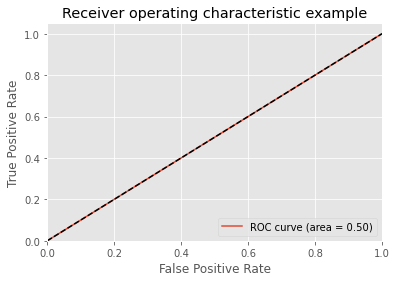

In [27]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression - 변수 중요도 확인

In [28]:
from matplotlib import pyplot

# get importance
importance = Logit.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.48288
Feature: 1, Score: 0.50646
Feature: 2, Score: 0.45302
Feature: 3, Score: 0.53062
Feature: 4, Score: 0.46789
Feature: 5, Score: 0.45292
Feature: 6, Score: 0.41915
Feature: 7, Score: -0.88476
Feature: 8, Score: -1.26640
Feature: 9, Score: -2.59238
Feature: 10, Score: -1.91650
Feature: 11, Score: -0.06595
Feature: 12, Score: -0.17857
Feature: 13, Score: -0.27391
Feature: 14, Score: 1.01592
Feature: 15, Score: -0.44658
Feature: 16, Score: 0.67093
Feature: 17, Score: 1.81149
Feature: 18, Score: 0.00000
Feature: 19, Score: -1.29242
Feature: 20, Score: -0.25419
Feature: 21, Score: -0.77486
Feature: 22, Score: 1.37436
Feature: 23, Score: 3.21007
Feature: 24, Score: -0.51065
Feature: 25, Score: 1.29636
Feature: 26, Score: 4.44647
Feature: 27, Score: 4.47497
Feature: 28, Score: 4.42850
Feature: 29, Score: 4.41890
Feature: 30, Score: 4.37909
Feature: 31, Score: 4.63744
Feature: 32, Score: 4.46193
Feature: 33, Score: 3.98956
Feature: 34, Score: 4.49210
Feature: 35, Score

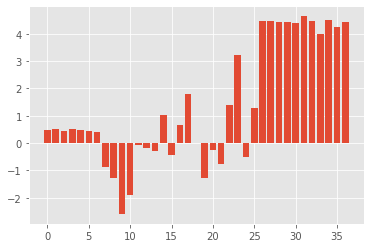

In [29]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Decision Tree

In [30]:
from sklearn import tree
Decision = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10, max_features= 3)
Decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=3,
                       random_state=10)

In [31]:
print("훈련 세트 정확도 : {:.5f}".format(Decision.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Decision.score(X_test,y_test)))

훈련 세트 정확도 : 0.89634
테스트 세트 정확도 : 0.84931


In [32]:
y_pred = Decision.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [33]:
pred_probs = Decision.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [34]:
get_clf_eval(y_test, pred_probs)

오차행렬:
 [[28489    12]
 [ 5046    18]]

정확도: 0.8493
정밀도: 0.6000
재현율: 0.0036
F1: 0.0071
AUC: 0.5016


In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

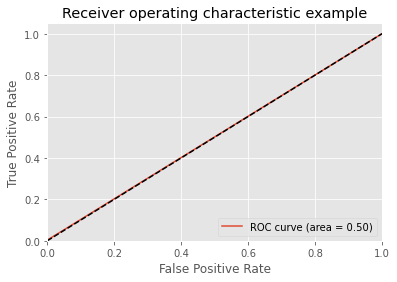

In [36]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Decision Tree - 변수 중요도

In [37]:
# get importance
importance =Decision.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06034
Feature: 1, Score: 0.06981
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00727
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03730
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00278
Feature: 8, Score: 0.00017
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00018
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00412
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.54991
Feature: 15, Score: 0.00014
Feature: 16, Score: 0.00132
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00091
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00078
Feature: 23, Score: 0.23489
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00934
Feature: 27, Score: 0.00077
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00686
Feature: 30, Score: 0.00485
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

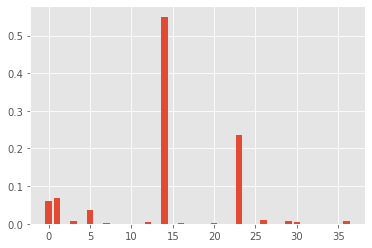

In [38]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest

In [39]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=5, random_state=0)

In [40]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.895
테스트 세트 정확도 : 0.849


In [41]:
pred_probs = forest.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [42]:
pred_probs

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
get_clf_eval(y_test, preds)

오차행렬:
 [[28501     0]
 [ 5064     0]]

정확도: 0.8491
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

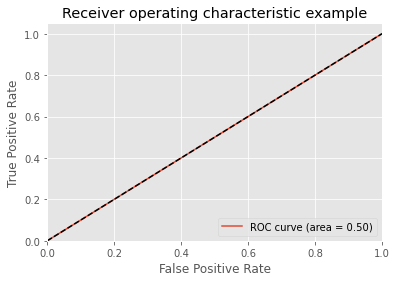

In [45]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [46]:
def plot_feature_importances_child(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


# Random Forest - 특성 중요도

In [47]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01123
Feature: 1, Score: 0.00291
Feature: 2, Score: 0.00157
Feature: 3, Score: 0.00112
Feature: 4, Score: 0.00250
Feature: 5, Score: 0.00279
Feature: 6, Score: 0.00778
Feature: 7, Score: 0.04197
Feature: 8, Score: 0.00011
Feature: 9, Score: 0.00145
Feature: 10, Score: 0.00056
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00098
Feature: 13, Score: 0.00021
Feature: 14, Score: 0.15834
Feature: 15, Score: 0.01231
Feature: 16, Score: 0.00009
Feature: 17, Score: 0.00032
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00026
Feature: 21, Score: 0.00028
Feature: 22, Score: 0.05482
Feature: 23, Score: 0.60545
Feature: 24, Score: 0.00059
Feature: 25, Score: 0.00306
Feature: 26, Score: 0.00877
Feature: 27, Score: 0.00175
Feature: 28, Score: 0.01505
Feature: 29, Score: 0.00652
Feature: 30, Score: 0.00926
Feature: 31, Score: 0.00025
Feature: 32, Score: 0.00379
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00427
Feature: 35, Score: 0.03321
Fe

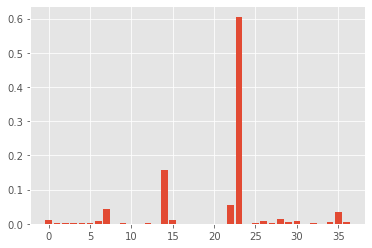

In [48]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# XGBOOST

In [49]:
import xgboost as xgb

epoch = 1000
learning_rate = 0.03
gamma = 0
subsampling = 0.6
max_depth = 5
xgb_model = xgboost.XGBRegressor(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(88470, 37) (88470, 1)
[04:36:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             subsampling=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [50]:
X_train

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_1년에 한번,판단_학대발생빈도_1주일에 한번,판단_학대발생빈도_2-3개월에 한번,판단_학대발생빈도_2~3일에 한번,판단_학대발생빈도_2년에 한번,판단_학대발생빈도_2주일에 한번,판단_학대발생빈도_3년에 한번,판단_학대발생빈도_6개월에 한번,판단_학대발생빈도_거의 매일,판단_학대발생빈도_일회성
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88465,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
88467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [52]:
params = {'max_depth' : 4,
         'eta' : 0.005, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 ,
         'sub_sample' : 0.3,
         'min_child_weight' : 5,
         'num_boost_around' : 10}

num_rounds = 100

In [53]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[04:36:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stoppings, num_boost_around, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68968	eval-logloss:0.69022
[1]	train-logloss:0.68625	eval-logloss:0.68733
[2]	train-logloss:0.68281	eval-logloss:0.68448
[3]	train-logloss:0.67948	eval-logloss:0.68165
[4]	train-logloss:0.67613	eval-logloss:0.67886
[5]	train-logloss:0.67282	eval-logloss:0.67606
[6]	train-logloss:0.66954	eval-logloss:0.67333
[7]	train-logloss:0.66627	eval-logloss:0.67064
[8]	train-logloss:0.66308	eval-logloss:0.66794
[9]	train-logloss:0.65988	eval-logloss:0.66528
[10]	train-logloss:0.65674	eval-logloss:0.66267
[11]	train-logloss:0.65364	eval-logloss:0.66006
[12]	train-

In [54]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.316 0.316 0.316 0.316 0.316 0.316 0.316 0.4   0.316 0.4  ]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [55]:
get_clf_eval(y_test, preds)

오차행렬:
 [[28501     0]
 [ 5064     0]]

정확도: 0.8491
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


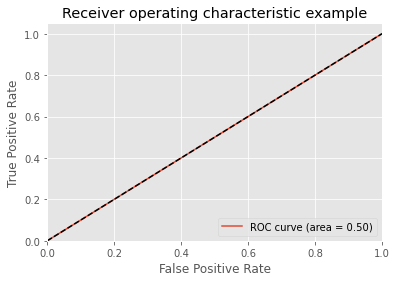

In [56]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# XGBOOST - 변수중요도

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

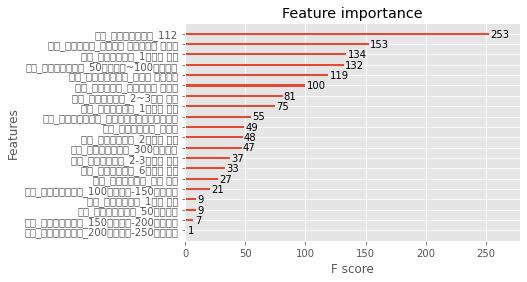

In [57]:
xgboost.plot_importance(xgb_model)

In [58]:
# import joblib
# Logit = joblib.load('logistic_model.pkl') 
# xgb_model = joblib.load('xgb_model.pkl') 
# forest = joblib.load('forest_model.pkl') 

# SVM

In [59]:
# 시간걸림
from sklearn import svm

clf = svm.SVC(kernel ='linear',C=1,gamma=0.1)  
# C : 작게하면 train 분류 부정확하지만 margin크게 / 크게하면 margin작게 하지만 train분류 정확
# noise가 많은 데이터라면 C작게, Noise가 별로 없으면 C크게 하는게 좋다
clf.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, gamma=0.1, kernel='linear')

In [60]:
y_pred = clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [61]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.895
테스트 세트 정확도 : 0.849


In [62]:
get_clf_eval(y_test, y_pred)

오차행렬:
 [[28484    17]
 [ 5057     7]]

정확도: 0.8488
정밀도: 0.2917
재현율: 0.0014
F1: 0.0028
AUC: 0.5004


In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

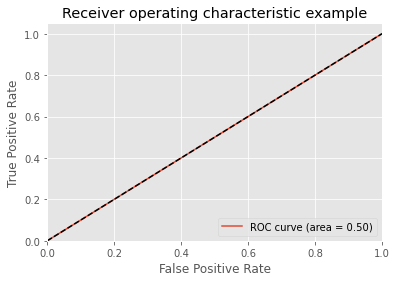

In [64]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()